In [1]:
from keras.api.models import load_model
import numpy as np
from whotarchitecture import *
import seaborn as sns
sns.set_theme()

In [2]:
X, y_face, y_suit = get_images(True)

In [3]:
indices = np.random.permutation(X.shape[0])
X = X[indices]
y_suit = y_suit[indices]
y_face = y_face[indices]

In [4]:
X_train, y_face_train, y_suit_train = X[:4000], y_face[:4000], y_suit[:4000]
X_test = X[4000:]
y_face_true = y_face[4000:]
y_suit_true = y_suit[4000:]

In [5]:
model = get_model(whole_train=True, X_train=X_train, y_face_train=y_face_train, y_suit_train=y_suit_train, epochs=15)

y_face_train shape = (4000, 13)
y_suit_train shape = (4000, 6)
X_train shape = (4000, 300, 200, 3)


Model: "whot_nn_architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (4000, 300, 200, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (4000, 150, 100, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (4000, 75, 50, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (4000, 37, 25, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (4000, 18, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (4000, 9, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (4000, 4, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (4000, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (4000, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ suit_output (Dense)             │ (4000, 6)              │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ face_output (Dense)             │ (4000, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,683 (776.11 KB)

 Trainable params: 198,427 (775.11 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 167ms/step - face_output_accuracy: 0.2264 - face_output_loss: 2.3210 - loss: 3.5256 - suit_output_accuracy: 0.5438 - suit_output_loss: 1.2043 - val_face_output_accuracy: 0.4317 - val_face_output_loss: 1.5341 - val_loss: 1.6380 - val_suit_output_accuracy: 0.9958 - val_suit_output_loss: 0.1046
Epoch 2/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - face_output_accuracy: 0.5466 - face_output_loss: 1.2341 - loss: 1.2997 - suit_output_accuracy: 0.9955 - suit_output_loss: 0.0655 - val_face_output_accuracy: 0.7833 - val_face_output_loss: 0.5295 - val_loss: 0.5444 - val_suit_output_accuracy: 1.0000 - val_suit_output_loss: 0.0133
Epoch 3/15
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - face_output_accuracy: 0.8774 - face_output_loss: 0.4000 - loss: 0.4162 - suit_output_accuracy: 0.9996 - suit_output_loss: 0.0162 - val_face_output_accuracy: 0.9508 - val_face_output_loss: 0.1584 - val_loss: 0.1625 - val_suit_output_accuracy: 1.0000 - val_suit_output_loss: 0.

In [ ]:
#  model.save("saved_model/full/whot_model.keras")

In [7]:
print('X_test shape =', X_test.shape)
print('y_face_true = ', y_face_true.shape)
print('y_suit_true = ', y_suit_true.shape)

X_test shape = (3191, 300, 200, 3)
y_face_true =  (3191,)
y_suit_true =  (3191,)


In [8]:
y_face_true[4]

np.int64(8)

In [9]:
y_suit_true[4]

np.int64(1)

In [10]:
predictions = predict(model, X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


In [11]:
predicted_suits = predictions['suits']
predicted_suits

array(['STAR', 'CROSS', 'SQUARE', ..., 'TRIANGLE', 'CROSS', 'CROSS'],
      dtype='<U8')

In [12]:
predicted_suits.shape

(3191,)

In [13]:
predicted_faces = predictions['faces']
predicted_faces

array([ 4, 14,  5, ...,  2, 11,  2])

In [14]:
predicted_faces.shape

(3191,)

In [15]:
true_suits = categorical_to_suit(y_suit_true)
true_suits.shape

(3191,)

In [16]:
true_suits

array(['STAR', 'CROSS', 'SQUARE', ..., 'TRIANGLE', 'CROSS', 'CROSS'],
      dtype='<U8')

In [17]:
true_faces = categorical_to_face(y_face_true)
true_faces.shape

(3191,)

In [18]:
true_faces

array([ 4, 14,  5, ...,  2, 11,  2])

In [19]:
suit_pred_accuracy = (len(true_suits[predicted_suits == true_suits])/ len(true_suits)) * 100
suit_pred_accuracy

100.0

In [20]:
face_pred_accuracy = (len(true_faces[predicted_faces == true_faces])/ len(true_faces)) * 100
face_pred_accuracy

100.0

In [21]:
len(true_faces[predicted_faces != true_faces])

0

In [44]:
len(true_suits[predicted_suits != true_suits])

0

In [24]:
whots = get_whotstr_output(predicted_suits, predicted_faces)
whots[7]

'14-CIRCLE'

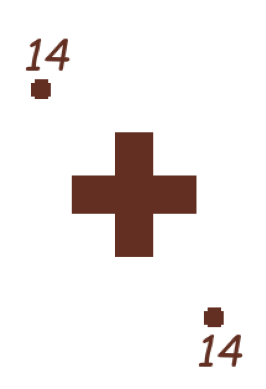

In [25]:
i = 1
display_whot_image(predicted_suits[i], predicted_faces[i], 'whots/whots/')

In [26]:
file = 'C:\\Users\\Matho\\Documents\\Whot card images\\SQUARE2_1.png'
img = format_image(True, file)
print(img.shape)

(1, 300, 200, 3)


In [27]:
p = predict(model, img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [28]:
print(p['suits'])
print(p['faces'])

['SQUARE']
[2]


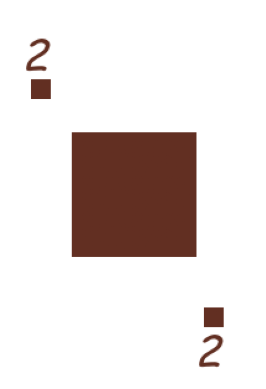

In [45]:
display_whot_image(p['suits'][0], p['faces'][0], 'whots/whots/')

In [30]:
loaded_model = load_model("saved_model/full/whot_model.keras", 
                   custom_objects={'WhotNNArchitecture':WhotNNArchitecture}, 
                   compile=False)

In [31]:
file2 = 'C:\\Users\\Matho\\Documents\\Whot card images\\TRIANGLE7_1.png'
#file2 ='/home/matho/WhotGame/Card images/white/CIRCLE3.png'
img2 = format_image(True, file2)

In [32]:
p1 = predict(model, img2)
print(p1['suits'])
p1['faces']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
['TRIANGLE']


array([7])

In [33]:
p2 = predict(loaded_model, img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [34]:
print(p2['suits'])
p2['faces']

['TRIANGLE']


array([7])

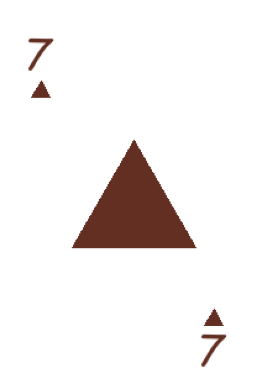

In [35]:
display_whot_image(p1['suits'][0], p1['faces'][0], 'whots/whots/')

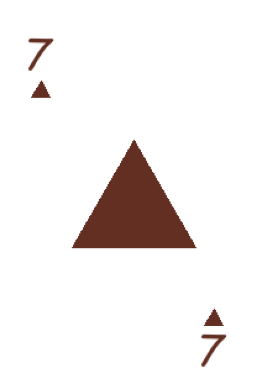

In [36]:
display_whot_image(p2['suits'][0], p2['faces'][0], 'whots/whots/')

In [37]:
model.summary()

Model: "whot_nn_architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (4000, 300, 200, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (4000, 150, 100, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (4000, 75, 50, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (4000, 37, 25, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (4000, 18, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (4000, 9, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (4000, 4, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (4000, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (4000, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ suit_output (Dense)             │ (4000, 6)              │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ face_output (Dense)             │ (4000, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 595,539 (2.27 MB)

 Trainable params: 198,427 (775.11 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 396,856 (1.51 MB)

In [38]:
loaded_model.summary()

Model: "whot_nn_architecture"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (4000, 300, 200, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (4000, 150, 100, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (4000, 75, 50, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (4000, 37, 25, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (4000, 18, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (4000, 9, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (4000, 4, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (4000, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (4000, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ suit_output (Dense)             │ (4000, 6)              │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ face_output (Dense)             │ (4000, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,683 (776.11 KB)

 Trainable params: 198,427 (775.11 KB)

 Non-trainable params: 256 (1.00 KB)

In [39]:
file3= 'C:\\Users\\Matho\\Documents\\Whot card images\\CIRCLE12_3.png'
img3 = format_image(True, file3)

In [40]:
p3 = predict(model, img3)
print(p3['suits'])
p3['faces']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
['CIRCLE']


array([12])

In [41]:
p4 = predict(loaded_model, img3)
print(p4['suits'])
p4['faces']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
['CIRCLE']


array([12])

In [42]:
np.allclose(model.predict(img3)['face_output'], loaded_model.predict(img3)['face_output'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


True

In [43]:
np.allclose(model.predict(img3)['suit_output'], loaded_model.predict(img3)['suit_output'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


True